In [1]:
import pandas as pd

orders = pd.read_csv('orders.csv', parse_dates=['order_date'])
products = pd.read_csv('products.csv')

df = pd.merge(orders, products, on='product_id', how='left')

df.head()

,order_id,customer_id,product_id,order_date,revenue,payment_type,city,category,sub_category,brand
0,10001,2103,5005,2025-06-09 06:16:33.033458,3001.89,Net Banking,Mumbai,Home Decor,Shirts,BrandA
1,10002,2436,5033,2025-06-30 06:16:33.033458,8196.28,Credit Card,Delhi,Home Decor,Lamps,BrandC
2,10003,2861,5065,2025-05-25 06:16:33.033458,8641.43,Debit Card,Ahmedabad,Fashion,Shoes,BrandD
3,10004,2271,5018,2025-06-05 06:16:33.033458,8495.84,Credit Card,Hyderabad,Home Decor,Laptops,BrandA
4,10005,2107,5096,2025-06-27 06:16:33.033458,9205.48,Debit Card,Delhi,Fashion,Shoes,BrandC


In [5]:
# City Wise Trend

city_summary = df.groupby('city').agg(
    total_revenue = ('revenue', 'sum'),
    total_orders = ('order_id', 'count')
)

In [4]:
city_summary['aov'] = city_summary['total_revenue']/city_summary['total_orders']
city_summary = city_summary.sort_values(by='total_revenue', ascending=False)
print(city_summary)

           total_revenue  total_orders          aov
city                                               
Hyderabad      801190.71           156  5135.837885
Bangalore      754786.66           148  5099.909865
Ahmedabad      754733.54           148  5099.550946
Kolkata        751587.54           145  5183.362345
Chennai        747336.60           141  5300.259574
Mumbai         684250.32           138  4958.335652
Delhi          612455.44           124  4939.156774


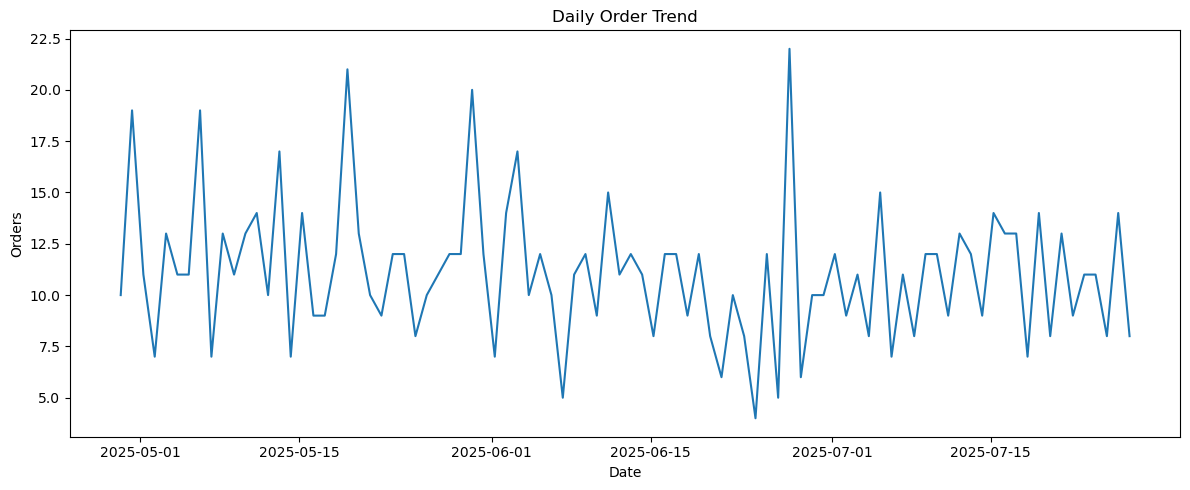

<Figure size 640x480 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daily orders trend

daily = df.groupby('order_date')['order_id'].count()

plt.figure(figsize=(12,5))
sns.lineplot(x=daily.index, y=daily.values)
plt.title('Daily Order Trend')
plt.xlabel('Date')
plt.ylabel('Orders')
plt.tight_layout()
plt.show()
plt.savefig("orders_trend.png")

In [8]:
# Top 5 products

top_products = df.groupby(['product_id', 'category'])['revenue'].sum().sort_values(ascending=False).head(5)
print(top_products)

product_id  category   
5051        Electronics    106526.81
5059        Electronics    105035.67
5040        Fashion        100356.29
5062        Fashion         93982.29
5029        Home Decor      90985.92
Name: revenue, dtype: float64


In [10]:
with pd.ExcelWriter('Business_Report.xlsx') as writer:
    city_summary.to_excel(writer, sheet_name='City Performance')
    top_products.to_frame(name='Revenue').to_excel(writer, sheet_name='Top Products')